In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

all_files = []
for file in os.listdir("./twitter_data"):
    if file.endswith(".csv"):
        all_files.append(os.path.join("./twitter_data", file))

print(all_files)
all_tweets_df = pd.concat((pd.read_csv(f) for f in all_files)).sort_values(by=['username', 'date'])
print(all_tweets_df[['username']].nunique())
all_tweets_df.sample(20)
all_tweets_df[['date']]


FileNotFoundError: [Errno 2] No such file or directory: './twitter_data'

In [2]:
candidates_data_df = all_tweets_df[['date', 'time', 'username', 'tweet', 'likes', 'retweets', 'replies']]
candidates_count = candidates_data_df['username'].nunique()
candidates_usernames = candidates_data_df['username'].unique()
print(candidates_usernames)

fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 40))
summary_plot_data = []

for i in range(candidates_count):
    candidate_data_df = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]
    candidate_tweets = candidate_data_df.groupby('date').count()
    
    plot_data = candidate_data_df[['date', 'username']].set_index('date').groupby('date').count()
    plot_data.name = candidates_usernames[i]
    ax = plot_data.plot(title="Tweets from " + plot_data.name, ax=axes[i], rot=90, fontsize=8, legend=False,
                        use_index=True)
    
    summary_plot_data.append(plot_data)
    ax.set(xlabel="Date", ylabel="Tweets count")

    candidate_tweets.reset_index(inplace=True)


NameError: name 'all_tweets_df' is not defined

In [ ]:
fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 60))

for i in range(candidates_count):
    candidate_data_df = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]

    tweets_popularity_df = candidate_data_df.pivot_table(index='date', values=['retweets', 'likes'], aggfunc=np.sum)
    print(tweets_popularity_df.head())
    tweets_popularity_df.reset_index(inplace=True)

    plot_data = tweets_popularity_df[['date', 'likes', 'retweets']].set_index('date')
    ax = plot_data.plot(title='Candidate tweet likes ' + candidates_usernames[i], ax=axes[i])
    ax.set(xlabel="Date", ylabel="Activity count")


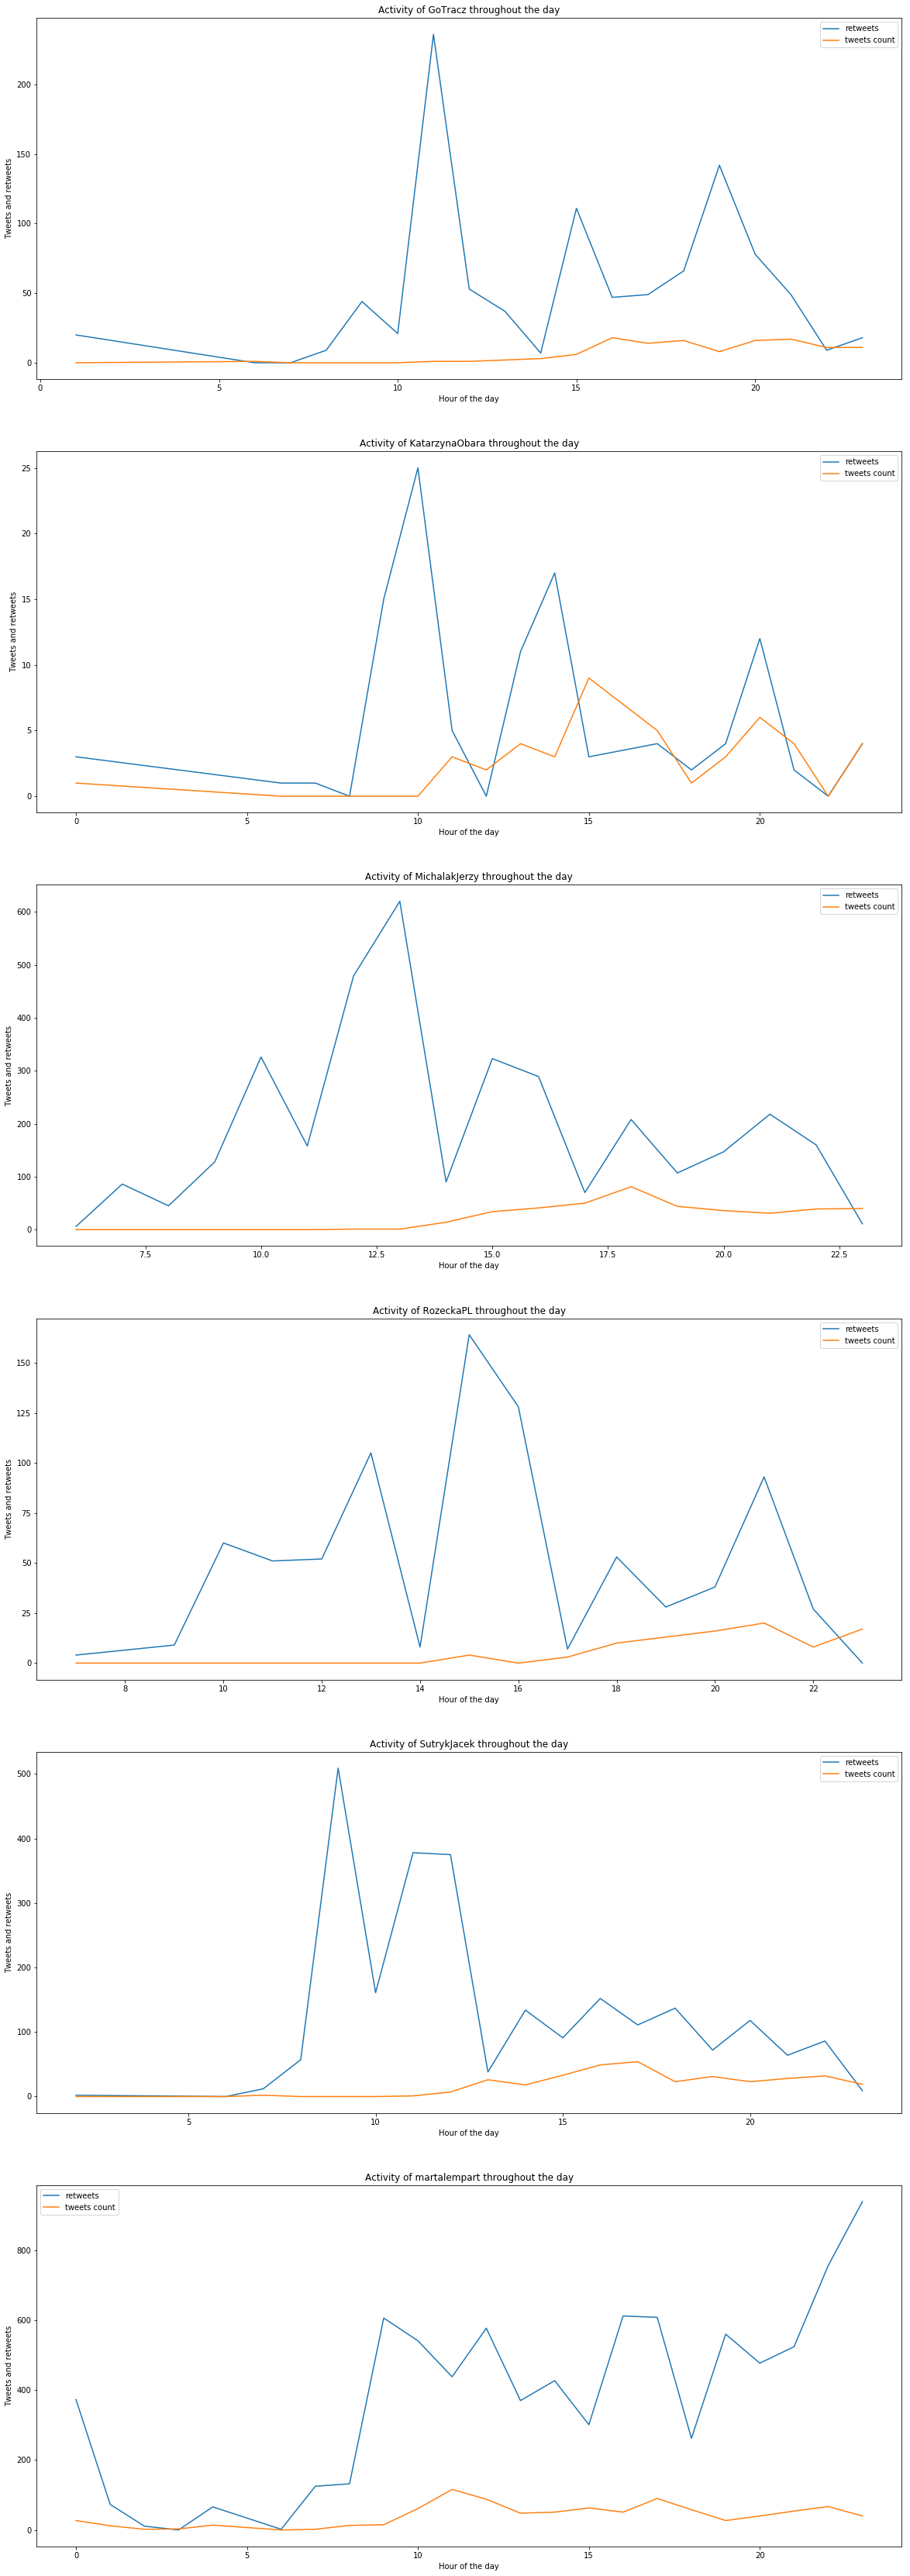

In [145]:
fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 60))

for i in range(candidates_count):
    candidate_data = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]

    hours_df = candidate_data[['time']].applymap(lambda x: int(x.split(':')[0]))
    hours_count = hours_df['time'].value_counts().sort_index()
    hours_count.name = 'count of tweets'

    activity_df = candidate_data.copy()
    activity_df['hour'] = pd.to_datetime(candidate_data['time'], format='%H:%M:%S').dt.hour

    activity_day_df = activity_df.pivot_table(index=['hour'], values=['retweets'], aggfunc=sum)
    activity_day_df.reset_index(inplace=True)
    activity_day_df['tweets count'] = hours_count
    activity_day_df = activity_day_df.fillna(0)

    plot_data = activity_day_df[['hour', 'retweets', 'tweets count']].set_index('hour')
    ax = plot_data.plot(title='Activity of ' + candidates_usernames[i] + ' throughout the day', legend=True, ax=axes[i])
    ax.set(xlabel="Hour of the day", ylabel="Tweets and retweets")


In [ ]:
fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 60))

for i in range(candidates_count):
    candidate_data = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]

    candidate_data['date'] = pd.to_datetime(candidate_data['date'])
    candidate_data['day_of_week'] = candidate_data['date'].dt.weekday_name
    activity_week_df = candidate_data.groupby('day_of_week').count()
    activity_week_df.reset_index(inplace=True)

    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    mapping = {day: i for i, day in enumerate(day_names)}
    sort_key = activity_week_df['day_of_week'].map(mapping)
    activity_week_df = activity_week_df.iloc[sort_key.argsort()].set_index('day_of_week')
    activity_week_df.reset_index(inplace=True)

    plot_data = activity_week_df[['day_of_week', 'username']].set_index('day_of_week')
    ax = plot_data.plot(title='Activity of ' + candidates_usernames[i] + ' throughout the week', legend=False,
                        ax=axes[i])
    ax.set(xlabel="Day of week", ylabel="Tweet count")
